In [5]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
features = [
    "danceability",
    "energy",
    "loudness",
    "tempo",
    "acousticness",
    "valence",
    "duration_ms"
]

X = df[features]
y = df["popularity"]

print(X.head())
print(y.head())

   danceability  energy  loudness    tempo  acousticness  valence  duration_ms
0         0.676  0.4610    -6.746   87.917        0.0322    0.715       230666
1         0.420  0.1660   -17.235   77.489        0.9240    0.267       149610
2         0.438  0.3590    -9.734   76.332        0.2100    0.120       210826
3         0.266  0.0596   -18.515  181.740        0.9050    0.143       201933
4         0.618  0.4430    -9.681  119.949        0.4690    0.167       198853
0    73
1    55
2    57
3    71
4    82
Name: popularity, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (91200, 7)
Test size: (22800, 7)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2: 0.009458768548538887
MSE: 488.8131637935664
MAE: 18.607086352759303


In [11]:
import pandas as pd

coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})

print(coefficients.sort_values(by="Coefficient", ascending=False))

        Feature  Coefficient
0  danceability     6.800538
2      loudness     0.490242
3         tempo     0.012361
6   duration_ms    -0.000003
4  acousticness    -1.898809
5       valence    -6.929277
1        energy    -8.336375


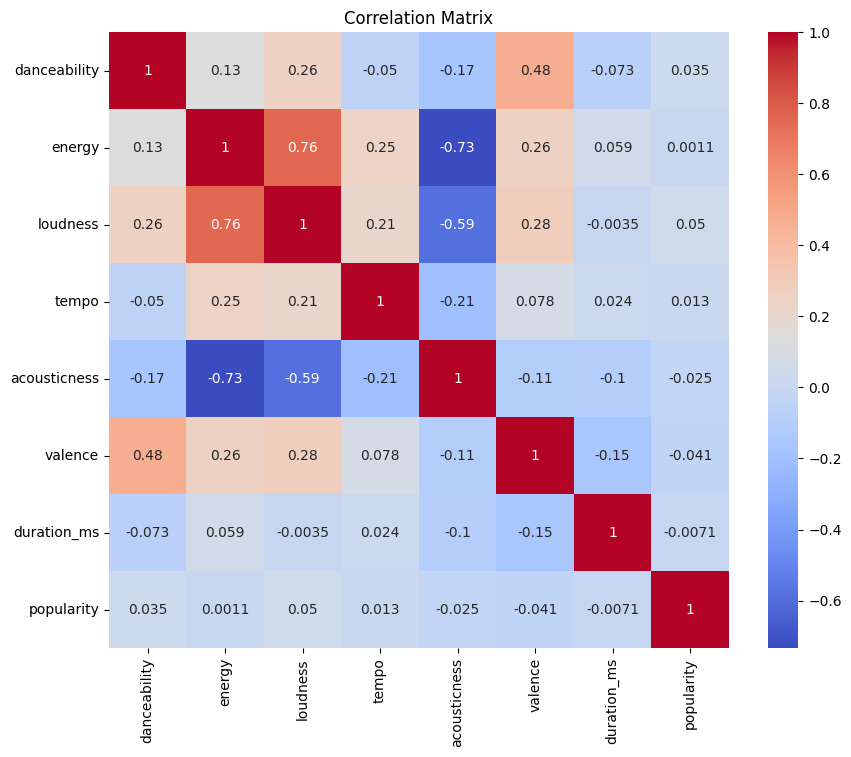

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df[features + ["popularity"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

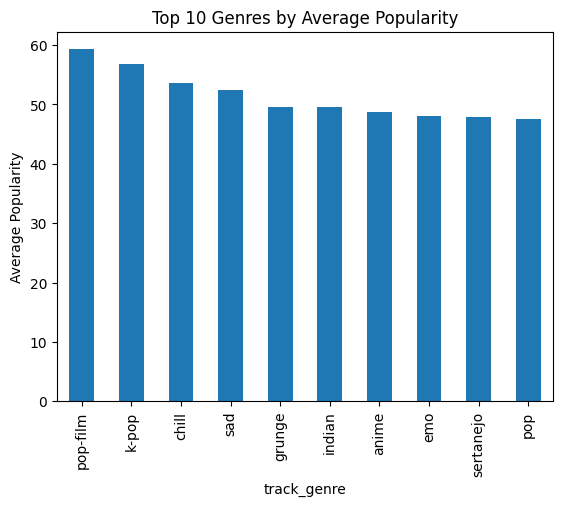

In [13]:
top_genres = df.groupby("track_genre")["popularity"].mean().sort_values(ascending=False).head(10)

top_genres.plot(kind="bar")
plt.title("Top 10 Genres by Average Popularity")
plt.ylabel("Average Popularity")
plt.show()

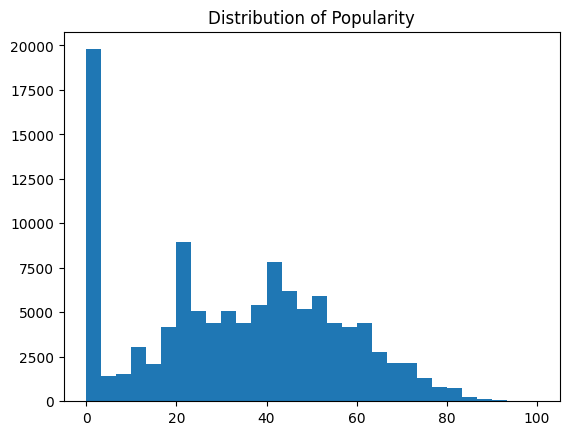

In [14]:
plt.hist(df["popularity"], bins=30)
plt.title("Distribution of Popularity")
plt.show()